In [1]:
import torch
import json
import numpy as np
import pickle
from pathlib import Path

import matplotlib.pyplot as plt

from s4hci.utils.data_handling import load_adi_data
from s4hci.models.noise import S4Ridge

## Load the data

In [2]:
dataset_config_file = "../../../../70_results/x1_s4_cross_validation/0100_C-0656-A/dataset.json"

with open(dataset_config_file) as json_file:
    dataset_config = json.load(json_file)

print("Loading data ... ", end='')
science_data, raw_angles, raw_psf_template_data = \
    load_adi_data(dataset_config["file_path"],
                  data_tag=dataset_config["stack_key"],
                  psf_template_tag=dataset_config["psf_template_key"],
                  para_tag=dataset_config["parang_key"])

psf_template_data = np.mean(raw_psf_template_data, axis=0)

X_train = science_data[0::2]
X_test = science_data[1::2]
print("[DONE]")

Loading data ... [DONE]


## Test different alphas

In [3]:
alphas = np.logspace(-1, 4, 50) #np.linspace(1000, 20000, 51)

In [4]:
alphas

array([1.00000000e-01, 1.26485522e-01, 1.59985872e-01, 2.02358965e-01,
       2.55954792e-01, 3.23745754e-01, 4.09491506e-01, 5.17947468e-01,
       6.55128557e-01, 8.28642773e-01, 1.04811313e+00, 1.32571137e+00,
       1.67683294e+00, 2.12095089e+00, 2.68269580e+00, 3.39322177e+00,
       4.29193426e+00, 5.42867544e+00, 6.86648845e+00, 8.68511374e+00,
       1.09854114e+01, 1.38949549e+01, 1.75751062e+01, 2.22299648e+01,
       2.81176870e+01, 3.55648031e+01, 4.49843267e+01, 5.68986603e+01,
       7.19685673e+01, 9.10298178e+01, 1.15139540e+02, 1.45634848e+02,
       1.84206997e+02, 2.32995181e+02, 2.94705170e+02, 3.72759372e+02,
       4.71486636e+02, 5.96362332e+02, 7.54312006e+02, 9.54095476e+02,
       1.20679264e+03, 1.52641797e+03, 1.93069773e+03, 2.44205309e+03,
       3.08884360e+03, 3.90693994e+03, 4.94171336e+03, 6.25055193e+03,
       7.90604321e+03, 1.00000000e+04])

In [5]:
step_size = 5

test_errors = []
all_betas = []

ridge_model = S4Ridge(
    X_train,
    psf_template_data,
    normalize_data=True,
    alpha=-1,
    available_devices=[0, 1],
    half_precision=False)

best_error = np.inf
best_alpha = 10000000

for tmp_alpha in alphas:
    print("Testing alpha = " + str(tmp_alpha))
    ridge_model.alpha = tmp_alpha

    errors, betas = ridge_model.fit_and_validate(
        step_size=step_size,
        test_science_data=X_test)
    
    all_betas.append(betas)
    
    median_errors = np.median(errors, axis=0)
    test_errors.append((np.median(median_errors), median_errors))
    
    if np.median(median_errors) < best_error:
        best_error = np.median(median_errors)
        best_alpha = tmp_alpha

Creating masks ... [DONE]
Normalizing data ... [DONE]
Testing alpha = 0.1


100%|██████████| 242/242 [04:08<00:00,  1.03s/it]


RuntimeError: CUDA error: invalid device ordinal
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

In [6]:
# save the results
root_save_dir = Path("../../../../70_results/x1_s4_cross_validation/01_Implement_alpha_validation/")

In [7]:
root_save_dir / "all_betas.pkl"

PosixPath('../../../../70_results/x1_s4_cross_validation/01_Implement_alpha_validation/all_betas.pkl')

In [ ]:
with open(root_save_dir / "01_all_betas.pkl", 'wb') as outp:
    pickle.dump(all_betas, outp, pickle.HIGHEST_PROTOCOL)
    
with open(root_save_dir / "01_test_errors.pkl", 'wb') as outp:
    pickle.dump(test_errors, outp, pickle.HIGHEST_PROTOCOL)

In [7]:
with open(root_save_dir / "01_all_betas.pkl", 'rb') as inp:
    all_betas = pickle.load(inp)
    
with open(root_save_dir / "01_test_errors.pkl", 'rb') as inp:
    test_errors = pickle.load(inp)

In [9]:
test_errors

[(0.4801964423113819,
  array([0.83819939, 0.75710406, 0.70864868, 0.73162212, 0.70113946,
         0.67041115, 0.69275377, 0.64149173, 0.60467431, 0.63683247,
         0.65942663, 0.65592294, 0.66221733, 0.6730831 , 0.69618632,
         0.71032773, 0.73010145, 0.70268651, 0.72007561, 0.72466825,
         0.7135544 , 0.78059164, 0.63831718, 0.52026829, 0.48029274,
         0.40285797, 0.40797116, 0.35807739, 0.34878394, 0.33915038,
         0.30805333, 0.65017937, 0.63841012, 0.56779289, 0.68883222,
         0.66202107, 0.6884885 , 0.72053228, 0.72451178, 0.73100805,
         0.7594534 , 0.71430783, 0.71747529, 0.76684267, 0.89126089,
         0.65299477, 0.6800716 , 0.76642158, 0.69560007, 0.7232065 ,
         0.56195163, 0.56921071, 0.50920051, 0.56230583, 0.5015556 ,
         0.52023991, 0.54860152, 0.58595593, 0.5960806 , 0.64531413,
         0.69579114, 0.7405989 , 0.73443355, 0.86029019, 0.71582203,
         0.7864133 , 0.97147059, 0.80453241, 0.78550833, 0.81865824,
         0.7

In [10]:
errors_col = [i[0] for i in test_errors]

In [21]:
best_alpha = alphas[np.argmin(errors_col)]
best_alpha

145.63484775012444

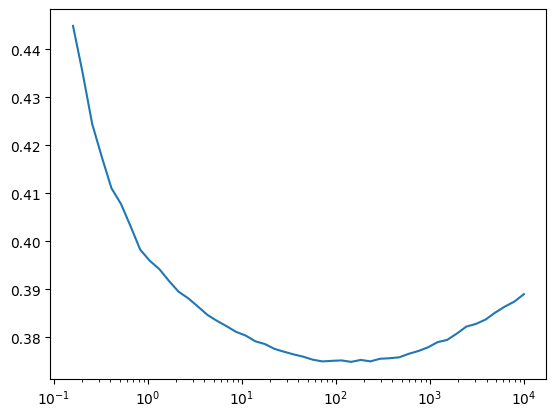

In [18]:
plt.plot(alphas[2:], np.array(errors_col)[2:])
plt.xscale("log")

# Interactive Beta Plots

In [19]:
from matplotlib import rcParams
import ipywidgets
from ipywidgets import interact
import IPython

In [20]:
rcParams['figure.figsize'] = (15, 6)

def generate_plots_(alpha,
                    idx):
    
    alpha_idx = np.where(alphas == alpha)[0][0]
    sel_beta = all_betas[alpha_idx][idx, :].reshape(107, 107)
    
    fig, ax = plt.subplots(1, 1)
    
    ax.imshow(torch.abs(sel_beta))
    ax.set_title("Alpha = " + str(alpha))
    
    plt.show()

# set up the interaction tools
alpha_slider = ipywidgets.SelectionSlider(
    options=alphas,
    value=alphas[0],
    description='Alpha:',
    disabled=False,
    orientation='horizontal',
    readout=True,
    readout_format='d')

idx_slider = ipywidgets.IntSlider(
    description='Position idx:',
    value=0,
    min=0,
    max=all_betas[0].shape[0] - 1,
    step=1,
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='d')

interact(
    generate_plots_,
    alpha=alpha_slider,
    idx=idx_slider,
);

interactive(children=(SelectionSlider(description='Alpha:', options=(0.1, 0.12648552168552962, 0.1599858719606…

# Final best model

In [22]:
final_ridge_model = S4Ridge(
    X_train,
    psf_template_data,
    normalize_data=True,
    alpha=best_alpha,
    available_devices=[0, 1],
    half_precision=False)

Creating masks ... [DONE]
Normalizing data ... [DONE]


In [ ]:
final_ridge_model.fit()

In [ ]:
with open(root_save_dir / "02_final_ridge_model.pkl", 'wb') as outp:
    pickle.dump(final_ridge_model, outp, pickle.HIGHEST_PROTOCOL)

In [23]:
with open(root_save_dir / "02_final_ridge_model.pkl", 'rb') as inp:
    final_ridge_model = pickle.load(inp)

In [24]:
rcParams['figure.figsize'] = (15, 6)

def generate_plots_(x, y):
    
    idx = x*107 + y
    
    tmp_betas = final_ridge_model.betas[idx, :]
    tmp_betas = tmp_betas.reshape(107, 107)
    
    fig, ax = plt.subplots(1, 1)
    
    ax.imshow(torch.abs(tmp_betas))
    
    plt.show()

# set up the interaction tools
x_slider = ipywidgets.IntSlider(
    description='X Position:',
    value=0,
    min=0,
    max=106,
    step=1,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='d')

y_slider = ipywidgets.IntSlider(
    description='Y Position:',
    value=0,
    min=0,
    max=106,
    step=1,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='d')

interact(
    generate_plots_,
    x=x_slider,
    y=y_slider,
);

interactive(children=(IntSlider(value=0, description='X Position:', max=106), IntSlider(value=0, description='…